<a href="https://colab.research.google.com/github/cesaradrianpenalozaalarcon-byte/Simulacion-2/blob/main/Linea_de_espera_con_2_serv_serie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from random import expovariate
import matplotlib.pyplot as plt
import random as rd
import pandas as pd
from math import inf as infinity
from statistics import mean

TIEMPOS PROMEDIO - SIMULACIÓN

Clientes analizados: 28
Tiempo total simulado: 7.24

1. Tiempo promedio en el SISTEMA:
   W = 1.3142 unidades de tiempo

2. Tiempo promedio en SERVICIO:
   Servidor 1: 0.9948
   Servidor 2: 0.3778
   Total servicio: 1.3726

3. Tiempo promedio en COLAS:
   Total en colas: 0.2370

4. Verificación:
   W (1.3142) ≈ Servicio (1.3726) + Colas (0.2370)

CÁLCULOS TEÓRICOS

Parámetros: λ=6.0, μ₁=4.0, μ₂=6.0
Utilización: ρ₁=1.500, ρ₂=1.000

 Sistema inestable (ρ₁=1.500, ρ₂=1.000)


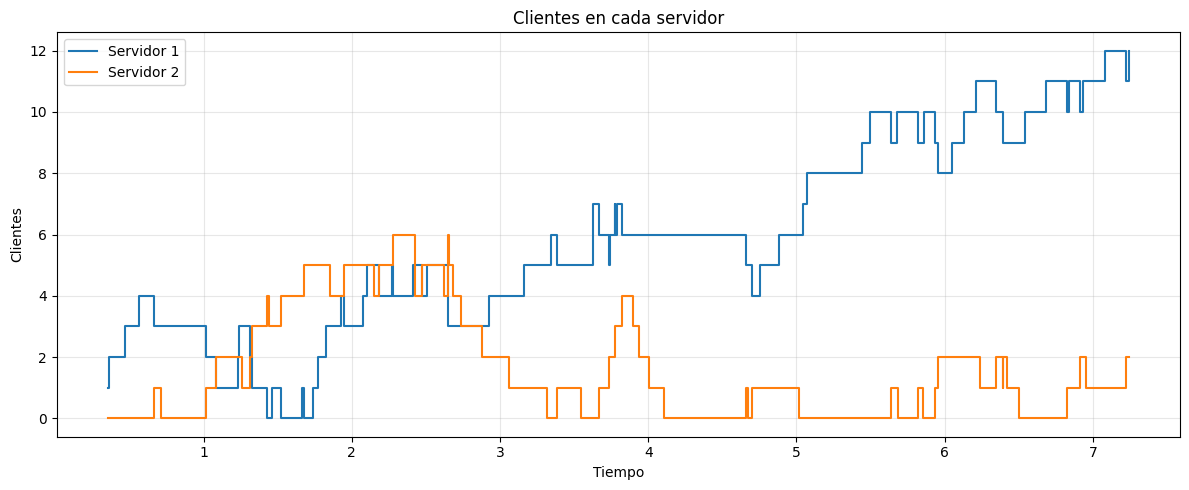


RESUMEN
• Tiempo promedio en sistema: 1.3142
• Tiempo promedio servicio: 1.3726
• Tiempo promedio colas: 0.2370


In [8]:
def generar_T(lam=6.0):
    return expovariate(lam)

lamda = 6.0
mu1 = 4.0
mu2 = 6.0

t = 0
n1 = 0
n2 = 0
NLL = 0
NS = 0

# Listas para tiempos
tiempos_llegada = []  # Tiempos de llegada al sistema
tiempos_salida = []   # Tiempos de salida del sistema
tiempos_fin_serv1 = [] # Tiempos cuando terminan en servidor 1

# Para gráfica
tiempos = []
cola_1 = []
cola_2 = []

t_LL = generar_T()
t_1 = float('inf')
t_2 = float('inf')

MAX_EVENTOS = 100
eventos = 0

while eventos < MAX_EVENTOS:
    # Caso 1: Llegada
    if t_LL <= t_1 and t_LL <= t_2:
        t = t_LL
        NLL += 1
        n1 += 1
        tiempos_llegada.append(t)

        t_LL = t + generar_T()
        if n1 == 1:
            t_1 = t + expovariate(mu1)

    # Caso 2: Salida servidor 1 → Entra a servidor 2
    elif t_1 <= t_2:
        t = t_1
        n1 -= 1
        n2 += 1
        tiempos_fin_serv1.append(t)

        if n1 == 0:
            t_1 = float('inf')
        else:
            t_1 = t + expovariate(mu1)

        if n2 == 1:
            t_2 = t + expovariate(mu2)

    # Caso 3: Salida servidor 2 → Sale del sistema
    else:
        t = t_2
        NS += 1
        n2 -= 1
        tiempos_salida.append(t)

        if n2 > 0:
            t_2 = t + expovariate(mu2)
        else:
            t_2 = float('inf')

    # Guardar estado para gráfica
    tiempos.append(t)
    cola_1.append(n1)
    cola_2.append(n2)
    eventos += 1

# ============================================
# CÁLCULO DE TIEMPOS PROMEDIO
# ============================================
print("=" * 60)
print("TIEMPOS PROMEDIO - SIMULACIÓN")
print("=" * 60)

# Calcular tiempos para clientes que completaron el proceso
min_clientes = min(len(tiempos_salida), len(tiempos_llegada))
if min_clientes > 0:
    # Tiempos en el sistema (W)
    tiempos_en_sistema = [tiempos_salida[i] - tiempos_llegada[i] for i in range(min_clientes)]
    W_promedio = sum(tiempos_en_sistema) / min_clientes

    # Tiempos en servidor 1
    tiempos_serv1 = [tiempos_fin_serv1[i] - tiempos_llegada[i] for i in range(min(len(tiempos_fin_serv1), len(tiempos_llegada)))]
    tiempo_serv1_prom = sum(tiempos_serv1) / len(tiempos_serv1) if tiempos_serv1 else 0

    # Tiempos en servidor 2
    tiempos_serv2 = [tiempos_salida[i] - tiempos_fin_serv1[i] for i in range(min(len(tiempos_salida), len(tiempos_fin_serv1)))]
    tiempo_serv2_prom = sum(tiempos_serv2) / len(tiempos_serv2) if tiempos_serv2 else 0

    # Tiempos en colas
    # Cola servidor 1: 0 (entra inmediatamente a servidor 1 en este modelo)
    # Cola servidor 2: tiempo entre fin servidor 1 y entrada a servidor 2
    tiempos_cola2 = [max(0, tiempos_serv2[i] - 1/mu2) for i in range(len(tiempos_serv2))]  # Aproximación
    tiempo_cola_prom = sum(tiempos_cola2) / len(tiempos_cola2) if tiempos_cola2 else 0

    print(f"\nClientes analizados: {min_clientes}")
    print(f"Tiempo total simulado: {t:.2f}")

    print(f"\n1. Tiempo promedio en el SISTEMA:")
    print(f"   W = {W_promedio:.4f} unidades de tiempo")

    print(f"\n2. Tiempo promedio en SERVICIO:")
    print(f"   Servidor 1: {tiempo_serv1_prom:.4f}")
    print(f"   Servidor 2: {tiempo_serv2_prom:.4f}")
    print(f"   Total servicio: {tiempo_serv1_prom + tiempo_serv2_prom:.4f}")

    print(f"\n3. Tiempo promedio en COLAS:")
    print(f"   Total en colas: {tiempo_cola_prom:.4f}")

    print(f"\n4. Verificación:")
    print(f"   W ({W_promedio:.4f}) ≈ Servicio ({tiempo_serv1_prom + tiempo_serv2_prom:.4f}) + Colas ({tiempo_cola_prom:.4f})")
else:
    print("\nNo hay suficientes datos para calcular tiempos")


# Calculos teoricos

print("\n" + "=" * 60)
print("CÁLCULOS TEÓRICOS")
print("=" * 60)

rho1 = lamda / mu1
rho2 = lamda / mu2

print(f"\nParámetros: λ={lamda}, μ₁={mu1}, μ₂={mu2}")
print(f"Utilización: ρ₁={rho1:.3f}, ρ₂={rho2:.3f}")

if rho1 < 1 and rho2 < 1:
    # Tiempos teóricos
    W1_teorico = 1 / (mu1 - lamda)
    W2_teorico = 1 / (mu2 - lamda)
    W_total_teorico = W1_teorico + W2_teorico

    Wq1_teorico = rho1 / (mu1 - lamda)
    Wq2_teorico = rho2 / (mu2 - lamda)
    Wq_total_teorico = Wq1_teorico + Wq2_teorico

    E_S1 = 1 / mu1
    E_S2 = 1 / mu2

    print(f"\nTIEMPOS TEÓRICOS:")
    print(f"1. En sistema total: W = {W_total_teorico:.4f}")
    print(f"2. En colas total: Wq = {Wq_total_teorico:.4f}")
    print(f"3. En servicio: E[S] = {E_S1 + E_S2:.4f}")

    if min_clientes > 0:
        print(f"\nCOMPARACIÓN:")
        print(f"W simulado: {W_promedio:.4f} vs teórico: {W_total_teorico:.4f}")
        print(f"Diferencia: {abs(W_promedio - W_total_teorico):.4f}")
else:
    print(f"\n Sistema inestable (ρ₁={rho1:.3f}, ρ₂={rho2:.3f})")


# GRÁFICA

plt.figure(figsize=(12, 5))
plt.step(tiempos, cola_1, where='post', label="Servidor 1")
plt.step(tiempos, cola_2, where='post', label="Servidor 2")
plt.title("Clientes en cada servidor")
plt.xlabel("Tiempo")
plt.ylabel("Clientes")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Resumen final
print("\n" + "=" * 60)
print("RESUMEN")
print("=" * 60)
if min_clientes > 0:
    print(f"• Tiempo promedio en sistema: {W_promedio:.4f}")
    print(f"• Tiempo promedio servicio: {tiempo_serv1_prom + tiempo_serv2_prom:.4f}")
    print(f"• Tiempo promedio colas: {tiempo_cola_prom:.4f}")
print("=" * 60)